# pandas 3 (第10章 数据聚合&分组运算)

### 1. 分组：groupby(key, as_index=False)

In [2]:
import pandas as pd
import numpy as np

col =pd.DataFrame({'color': ['white','red','green','red','green'], 'object': ['pen','pencil','pencil','ashtray','pen'],'price1':[5.56,4.20,1.30,0.56,2.75],'price2':[4.75,4.12,1.60,0.75,3.15]})
col

,color,object,price1,price2
0,white,pen,5.56,4.75
1,red,pencil,4.20,4.12
2,green,pencil,1.30,1.60
3,red,ashtray,0.56,0.75
4,green,pen,2.75,3.15


In [15]:
col.groupby(col['color']).mean()

,price1,price2
color,,
green,2.025,2.375
red,2.380,2.435
white,5.560,4.750


In [5]:
col['price1'].groupby(col['color']).mean()  # 计算分组平均值

color
green    2.025
red      2.380
white    5.560
Name: price1, dtype: float64

In [6]:
# col.groupby('object').mean()
col.groupby(['color'])['price1'].mean()   # 作用同上

color
green    2.025
red      2.380
white    5.560
Name: price1, dtype: float64

In [8]:
col.groupby(['color'], as_index=False)['price1'].mean()   # as_index参数

,color,price1
0,green,2.025
1,red,2.380
2,white,5.560


In [9]:
# 多个字段 分组
col.groupby(['color', 'object'])['price1'].mean()

color  object 
green  pen        2.75
       pencil     1.30
red    ashtray    0.56
       pencil     4.20
white  pen        5.56
Name: price1, dtype: float64

In [10]:
col.groupby(['color', 'object'])['price1'].mean().unstack()   # unstack()方法的使用

object,ashtray,pen,pencil
color,,,
green,NaN,2.75,1.3
red,0.56,NaN,4.2
white,NaN,5.56,NaN


In [17]:
# col.groupby('object').size()
col.groupby(['object', 'color']).size()

object   color
ashtray  red      1
pen      green    1
         white    1
pencil   green    1
         red      1
dtype: int64

### 对分组进行迭代

In [19]:
for name, group in col.groupby(['object']):
    print(name)
    print(group)

ashtray
  color   object  price1  price2
3   red  ashtray    0.56    0.75
pen
   color object  price1  price2
0  white    pen    5.56    4.75
4  green    pen    2.75    3.15
pencil
   color  object  price1  price2
1    red  pencil     4.2    4.12
2  green  pencil     1.3    1.60


In [21]:
for (p1, p2), group in col.groupby(['color', 'object']):
    print((p1, p2))
    print(group)

('green', 'pen')
   color object  price1  price2
4  green    pen    2.75    3.15
('green', 'pencil')
   color  object  price1  price2
2  green  pencil     1.3     1.6
('red', 'ashtray')
  color   object  price1  price2
3   red  ashtray    0.56    0.75
('red', 'pencil')
  color  object  price1  price2
1   red  pencil     4.2    4.12
('white', 'pen')
   color object  price1  price2
0  white    pen    5.56    4.75


In [22]:
list(col.groupby('object'))

[('ashtray',   color   object  price1  price2
  3   red  ashtray    0.56    0.75), ('pen',    color object  price1  price2
  0  white    pen    5.56    4.75
  4  green    pen    2.75    3.15), ('pencil',    color  object  price1  price2
  1    red  pencil     4.2    4.12
  2  green  pencil     1.3    1.60)]

In [23]:
dict(list(col.groupby('object')))   # 转换成字典

{'ashtray':   color   object  price1  price2
 3   red  ashtray    0.56    0.75, 'pen':    color object  price1  price2
 0  white    pen    5.56    4.75
 4  green    pen    2.75    3.15, 'pencil':    color  object  price1  price2
 1    red  pencil     4.2    4.12
 2  green  pencil     1.3    1.60}

In [24]:
dict(list(col.groupby('object')))['pen']

,color,object,price1,price2
0,white,pen,5.56,4.75
4,green,pen,2.75,3.15


### 数据聚合 -- count()

In [28]:
ct = col.groupby('object').count()
ct

,color,price1,price2
object,,,
ashtray,1,1,1
pen,2,2,2
pencil,2,2,2


<function matplotlib.pyplot.show(*args, **kw)>

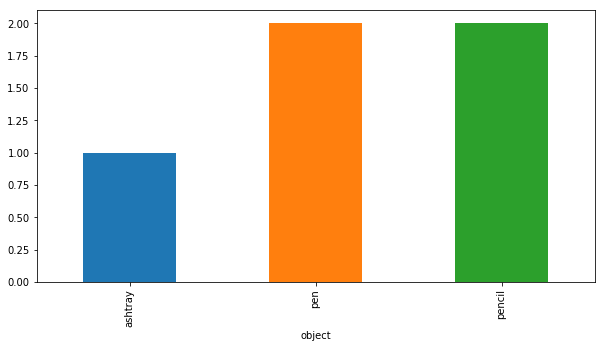

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

ct['price1'].plot(kind='bar',figsize=(10, 5))
plt.show

In [ ]:
#